In [268]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
from tensorflow import keras

In [224]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noemi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\noemi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\noemi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [225]:
#Load the data from the CSV files
fake_news = pd.read_csv('Fake.csv')
fake_news.isnull().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [226]:
true_news = pd.read_csv('True.csv')
true_news.isnull().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [227]:
#Load the data into dataframes
df_fake = pd.DataFrame(fake_news)
df_true = pd.DataFrame(true_news)

In [228]:
labels = []

for i in range(0, len(df_fake)):
    labels.append(1)

In [229]:
df_fake['label'] = labels

In [230]:
labels = []

for i in range(0, len(df_true)):
    labels.append(0)

In [231]:
df_true['label'] = labels

In [232]:
#Merge the two dataset into one
frames = [df_fake, df_true]
result = pd.concat(frames)
result

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [233]:
#Shuffle the rows of the new dataframe
data = result.sample(frac=1).reset_index(drop=True)
data

,title,text,subject,date,label
0,OPEN BORDERS BERNIE Threatens Sheriff Arpaio F...,Just what America needs another President who ...,politics,"Mar 20, 2016",1
1,Trump says Mexico 'eventually' will pay for bo...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"April 23, 2017",0
2,SHOCKING! MSNBC REPORTER GRILLS MAXINE WATERS ...,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",politics,"May 14, 2017",1
3,"NRA Finally Vomits Up Stupid, Hypocritical No...","Philandro Castile, the black man in Minnesota ...",News,"July 8, 2016",1
4,CATHERINE HERRIDGE: ‘Verifiable Proof’ Comey D...,It had been reported (see our previous report ...,politics,"Oct 17, 2017",1
...,...,...,...,...,...
44893,Former FBI Agent: ‘Stay Tuned’ Because Muelle...,Donald Trump is terrified of Special Counsel R...,News,"August 6, 2017",1
44894,Hateful Letter To Food Bank PROVES We Need Fo...,"A few days before Thanksgiving, a food bank in...",News,"November 25, 2016",1
44895,"Pakistani peace activist reported missing, pol...","Karachi, Pakistan (Reuters) - A Pakistani peac...",worldnews,"December 5, 2017",0
44896,"Trump softens immigration stance, takes measur...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 28, 2017",0


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [235]:
data.shape

(44898, 5)

In [236]:
print(np.unique(data['label']))
print(np.unique(data['label'].value_counts()))

[0 1]
[21417 23481]


In [237]:
#Remove punctuations
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

data['removed_punc'] = data['text'].apply(lambda x: remove_punct(x))

In [238]:
#Tokenization
def tokenize(text):
    text = word_tokenize(text)
    return [x.lower() for x in text]

data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))

In [239]:
#Removing small words
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [243]:
data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))

In [244]:
#Removing small words
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    text = [word for word in text if word not in stopwords]
    return text

In [245]:
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : clean_text(x))

In [246]:
#Lemmatization
word_net = WordNetLemmatizer()

def lemmatize(text):
    return [word_net.lemmatize(word) for word in text]

In [247]:
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))

In [249]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [251]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,title,text,subject,date,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,OPEN BORDERS BERNIE Threatens Sheriff Arpaio F...,Just what America needs another President who ...,politics,"Mar 20, 2016",1,Just what America needs another President who ...,"[just, what, america, needs, another, presiden...","[just, what, america, needs, another, presiden...","[america, needs, another, president, makes, la...","[america, need, another, president, make, law,...",america need another president make law radica...
1,Trump says Mexico 'eventually' will pay for bo...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"April 23, 2017",0,WASHINGTON Reuters President Donald Trump sai...,"[washington, reuters, president, donald, trump...","[washington, reuters, president, donald, trump...","[washington, reuters, president, donald, trump...","[washington, reuters, president, donald, trump...",washington reuters president donald trump said...
2,SHOCKING! MSNBC REPORTER GRILLS MAXINE WATERS ...,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",politics,"May 14, 2017",1,TERM LIMITS TERM LIMITS TERM LIMITS Maxine Wat...,"[term, limits, term, limits, term, limits, max...","[term, limits, term, limits, term, limits, max...","[term, limits, term, limits, term, limits, max...","[term, limit, term, limit, term, limit, maxine...",term limit term limit term limit maxine water ...
3,"NRA Finally Vomits Up Stupid, Hypocritical No...","Philandro Castile, the black man in Minnesota ...",News,"July 8, 2016",1,Philandro Castile the black man in Minnesota w...,"[philandro, castile, the, black, man, in, minn...","[philandro, castile, black, minnesota, license...","[philandro, castile, black, minnesota, license...","[philandro, castile, black, minnesota, license...",philandro castile black minnesota licensed con...
4,CATHERINE HERRIDGE: ‘Verifiable Proof’ Comey D...,It had been reported (see our previous report ...,politics,"Oct 17, 2017",1,It had been reported see our previous report b...,"[it, had, been, reported, see, our, previous, ...","[been, reported, previous, report, below, veri...","[reported, previous, report, verified, directo...","[reported, previous, report, verified, directo...",reported previous report verified director jam...


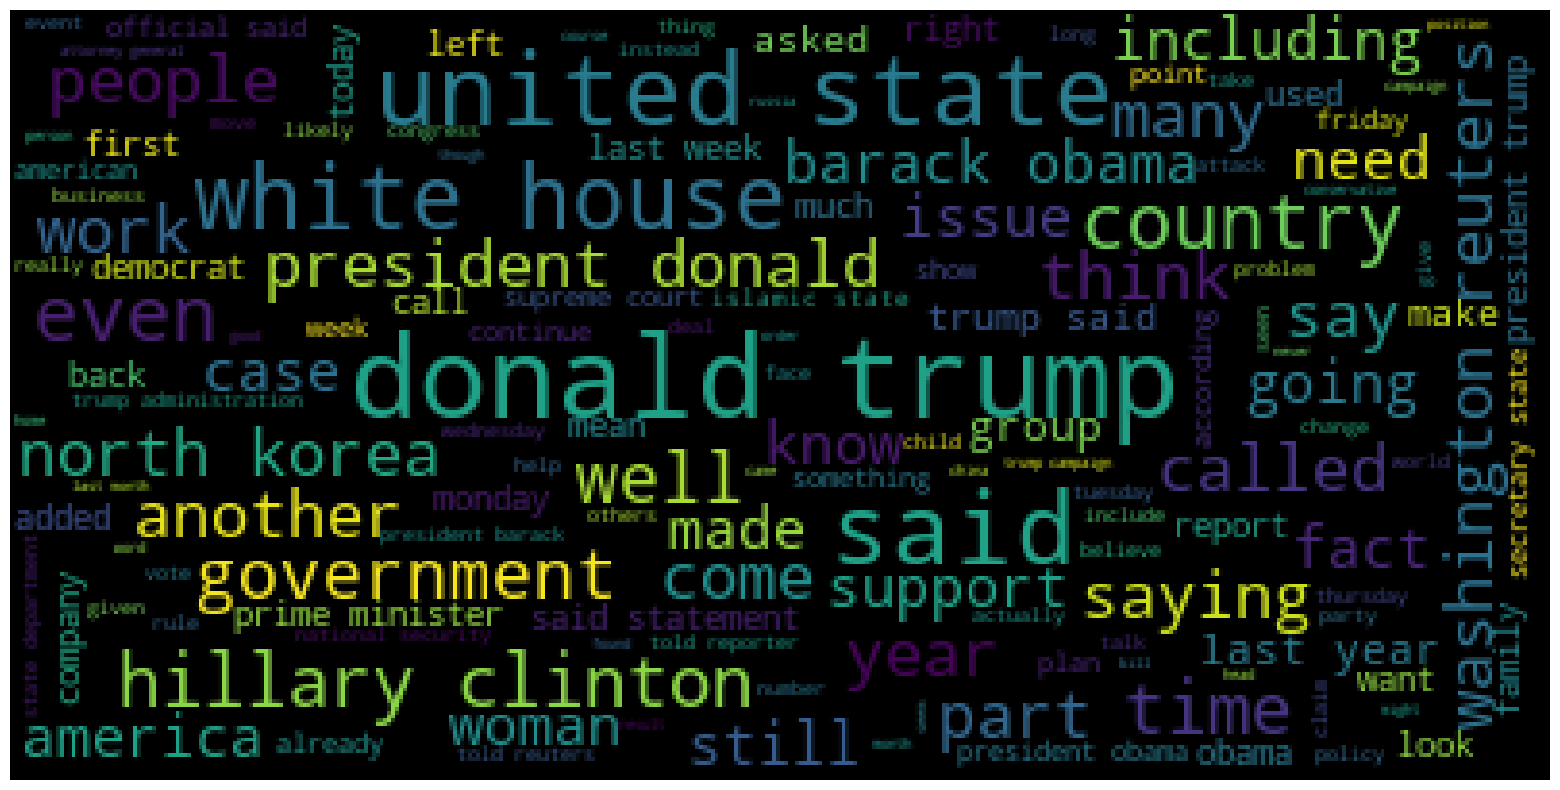

In [253]:
#Generating word cloud
text = " ".join([x for x in final_df['clean_text']])
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [254]:
#Split data
train_size = int(len(data) * .8)
print("Train size: %d" % train_size)
print("Test size: %d" % (len(data) - train_size))

Train size: 35918
Test size: 8980


In [256]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [257]:
train_text, test_text = train_test_split(data['clean_text'], train_size)

In [258]:
train_label, test_label = train_test_split(data['label'], train_size)

In [259]:
train_text

0        america need another president make law radica...
1        washington reuters president donald trump said...
2        term limit term limit term limit maxine water ...
3        philandro castile black minnesota licensed con...
4        reported previous report verified director jam...
                               ...                        
35913    donald trump getting absolutely hammered recen...
35914    washington reuters mike penny doubt life would...
35915    reuters connecticut senate passed bill wednesd...
35916    washington reuters republican presidential can...
35917    functiond dgetelementsbytagnames0 dgetelementb...
Name: clean_text, Length: 35918, dtype: object

In [260]:
train_label

0        1
1        0
2        1
3        1
4        1
        ..
35913    1
35914    0
35915    0
35916    0
35917    1
Name: label, Length: 35918, dtype: int64

In [261]:
max_words = 1000

tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)

In [262]:
#Let's fit the tokenizer to the training data
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [263]:
x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [264]:
#Use sklearn utility to convert the label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)

In [265]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [266]:
#Convert the labels to one-hot representation
num_classes = np.max(y_train) +1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [267]:
#Train model
batch_size = 32
epochs = 5
drop_ratio = 0.5

In [269]:
layers = keras.layers
models = keras.models

In [270]:
#Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words, )))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [271]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               512512    
                                                                 
 activation_31 (Activation)  (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 2)                 1026      
                                                                 
 activation_32 (Activation)  (None, 2)                 0         
                                                                 
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


In [272]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/5
1011/1011 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0211 - val_accuracy: 0.9947
Epoch 2/5
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0148 - val_accuracy: 0.9969
Epoch 3/5
1011/1011 [==============================] - 3s 3ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0137 - val_accuracy: 0.9967
Epoch 4/5
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0137 - val_accuracy: 0.9975
Epoch 5/5
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0174 - val_accuracy: 0.9969


In [273]:
#Evaluate the model. Just call the function model.evaluate()
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy: ', score[1])

281/281 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9970
Test loss: 0.014937834814190865
Test accuracy:  0.9969933032989502


In [274]:
#Evaluate the model
text_labels = encoder.classes_

In [275]:
for i in range(10, 20):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    
    #a if a < b else b
    print(test_text.iloc[i][:100], "...")
    print('Actual label:' + ("Fake" if test_label.iloc[i] == 1 else "True"))          
    print('Predicted label:' + ("Fake" if predicted_label == 1 else "True") + '\n')

1/1 [==============================] - 0s 35ms/step
fear cancellation based misinformation grown fear intolerance transphobia homophobia misogyny wrote  ...
Actual label:Fake
Predicted label:Fake

1/1 [==============================] - 0s 16ms/step
reuters federal judge michigan wednesday revoked order requiring recount state presidential vote sou ...
Actual label:True
Predicted label:True

1/1 [==============================] - 0s 17ms/step
london reuters british foreign secretary boris johnson said tuesday remark last week jailed iranianb ...
Actual label:True
Predicted label:True

1/1 [==============================] - 0s 13ms/step
washington reuters lawmaker said highprofile briefing trump administration north korea wednesday fai ...
Actual label:True
Predicted label:True

1/1 [==============================] - 0s 13ms/step
sandy spring april reuters president donald trump offyear congressional election tuesday reliably re ...
Actual label:Fake
Predicted label:Fake

1/1 [==========